# Import Necessray library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2024-07-10 16:44:27.711706: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-10 16:44:27.711844: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-10 16:44:27.875149: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Reading the Data

In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-dataset/Dataset Heart Disease.csv')

# Explore The Data

In [3]:
df.shape

(1048, 13)

In [4]:
df.head()

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,4,54,1,3,150,195.0,0,0,122,0,0.0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1048 non-null   int64  
 1   age                  1048 non-null   int64  
 2   sex                  1048 non-null   int64  
 3   chest pain type      1048 non-null   int64  
 4   resting bps          1048 non-null   int64  
 5   cholesterol          1048 non-null   float64
 6   fasting blood sugar  1048 non-null   int64  
 7   resting ecg          1048 non-null   int64  
 8   max heart rate       1048 non-null   int64  
 9   exercise angina      1048 non-null   int64  
 10  oldpeak              1048 non-null   float64
 11  ST slope             1048 non-null   int64  
 12  target               1048 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 106.6 KB


**No Null value**

In [6]:
df.isnull().sum()

Unnamed: 0             0
age                    0
sex                    0
chest pain type        0
resting bps            0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,390.841603,53.325382,0.734733,2.817748,132.613550,245.172710,0.162214,0.606870,142.918893,0.368321,0.942366,1.532443,0.496183
std,307.916633,9.397822,0.441686,1.118649,17.367605,57.101359,0.368823,0.763313,24.427115,0.482579,1.100429,0.611023,0.500224
min,0.000000,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,69.000000,0.000000,-0.100000,0.000000,0.000000
25%,130.750000,46.000000,0.000000,2.000000,120.000000,208.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,0.000000
50%,262.000000,54.000000,1.000000,3.000000,130.000000,239.000000,0.000000,0.000000,144.000000,0.000000,0.600000,2.000000,0.000000
75%,657.250000,60.000000,1.000000,4.000000,140.000000,275.000000,0.000000,1.000000,162.000000,1.000000,1.600000,2.000000,1.000000
max,1189.000000,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


# Cleaning the Data

**Drop uneeded columns**

In [9]:
df.drop(columns='Unnamed: 0',axis = 1, inplace =True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1048 non-null   int64  
 1   sex                  1048 non-null   int64  
 2   chest pain type      1048 non-null   int64  
 3   resting bps          1048 non-null   int64  
 4   cholesterol          1048 non-null   float64
 5   fasting blood sugar  1048 non-null   int64  
 6   resting ecg          1048 non-null   int64  
 7   max heart rate       1048 non-null   int64  
 8   exercise angina      1048 non-null   int64  
 9   oldpeak              1048 non-null   float64
 10  ST slope             1048 non-null   int64  
 11  target               1048 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 98.4 KB


In [11]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1048 non-null   int64  
 1   sex                  1048 non-null   int64  
 2   chest pain type      1048 non-null   int64  
 3   resting bps          1048 non-null   int64  
 4   cholesterol          1048 non-null   float64
 5   fasting blood sugar  1048 non-null   int64  
 6   resting ecg          1048 non-null   int64  
 7   max heart rate       1048 non-null   int64  
 8   exercise angina      1048 non-null   int64  
 9   oldpeak              1048 non-null   float64
 10  ST slope             1048 non-null   int64  
 11  target               1048 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 98.4 KB


# Visualization and Analysis 

**preprocessing each column of the data and check of the outliers and remove it:**

In [13]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bps', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


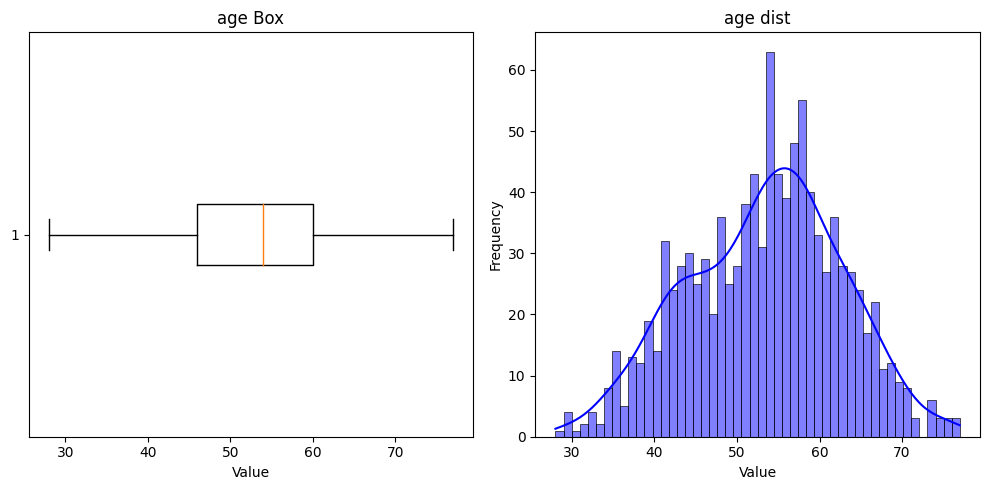

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


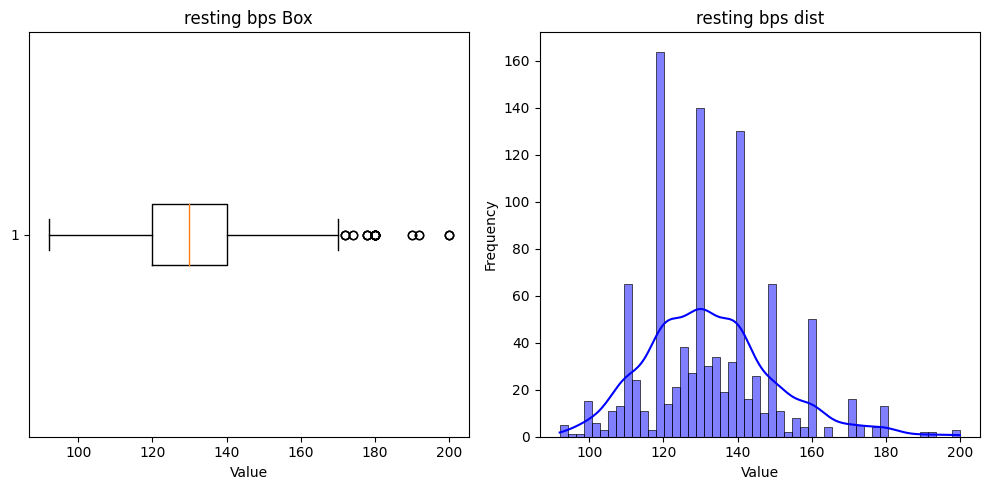

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


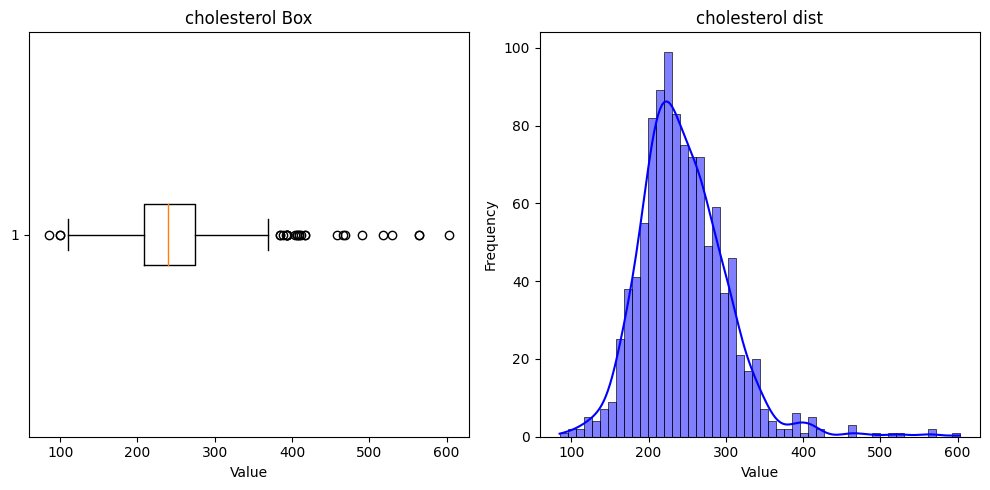

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


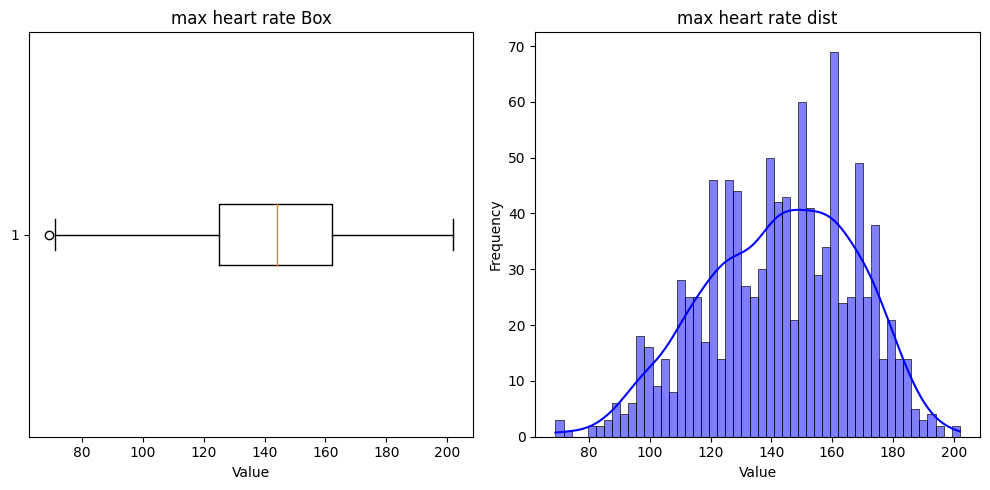

In [14]:
columns = ['age', 'resting bps', 'cholesterol','max heart rate']
for column in columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))

        ax_box.boxplot(df[column], vert=False, whis=1.5)
        ax_box.set_xlabel('Value')
        ax_box.set_title(f'{column} Box')

        sns.histplot(df[column], bins=50, color='blue', kde=True, ax=ax_hist)
        ax_hist.set_xlabel('Value')
        ax_hist.set_ylabel('Frequency')
        ax_hist.set_title(f'{column} dist')

        # Show plot
        plt.tight_layout()
        plt.show()

**This is columns i will handle the outlier in this data**

**Now lets handle this and after that make visualization again**

In [15]:
filter_data=pd.DataFrame()
for column in columns:
    if df[column].dtype=='float64' or df[column].dtype == 'int64':
        filter_data[column]=df[column]
print(filter_data.info())
for column in filter_data.columns:
    Q1 = filter_data[column].quantile(0.25)
    Q3 = filter_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = filter_data[(filter_data[column] >= lower_bound) & (filter_data[column] <= upper_bound)][column]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1048 non-null   int64  
 1   resting bps     1048 non-null   int64  
 2   cholesterol     1048 non-null   float64
 3   max heart rate  1048 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 32.9 KB
None


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


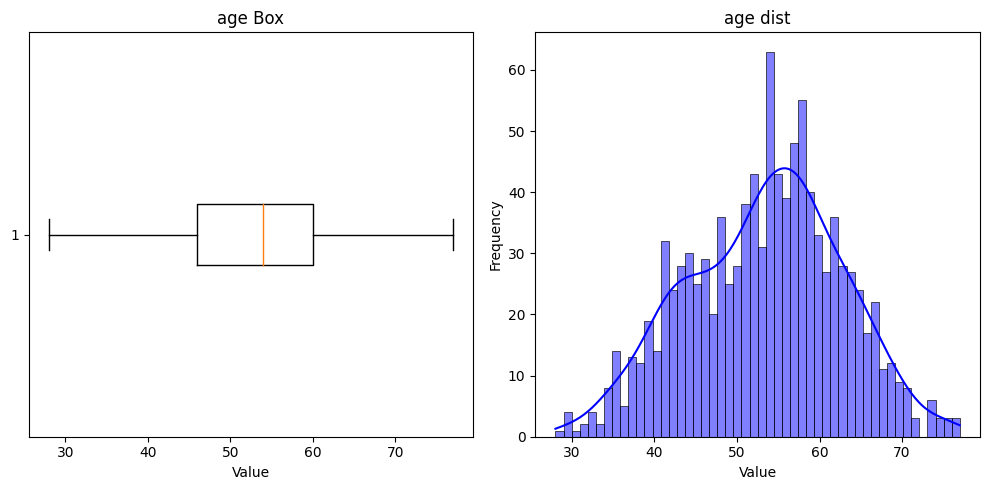

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


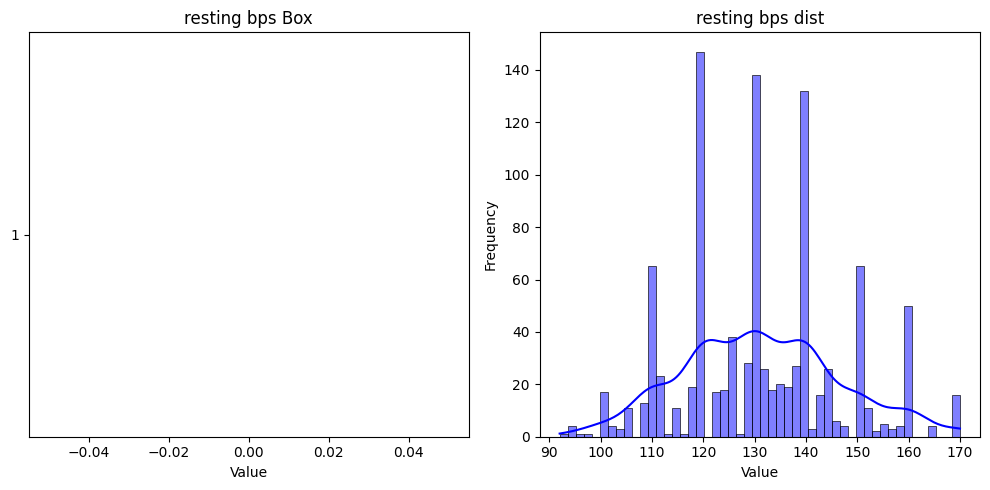

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


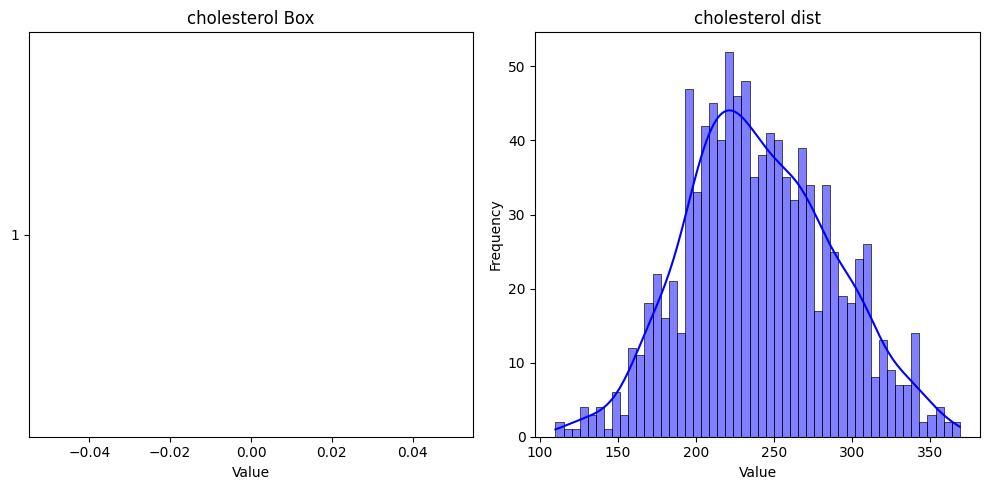

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


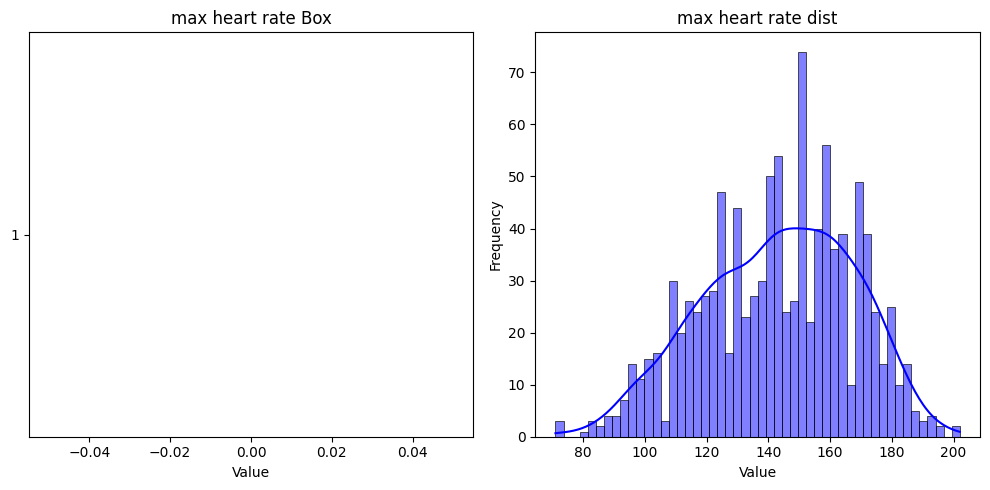

In [16]:
columns = ['age', 'resting bps', 'cholesterol','max heart rate']
for column in columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))

        ax_box.boxplot(df[column], vert=False, whis=1.5)
        ax_box.set_xlabel('Value')
        ax_box.set_title(f'{column} Box')

        sns.histplot(df[column], bins=50, color='blue', kde=True, ax=ax_hist)
        ax_hist.set_xlabel('Value')
        ax_hist.set_ylabel('Frequency')
        ax_hist.set_title(f'{column} dist')

        # Show plot
        plt.tight_layout()
        plt.show()

<h2>Sex<h2>

In [17]:
sex = df['sex'].value_counts().reset_index()
sex

,sex,count
0,1,770
1,0,278


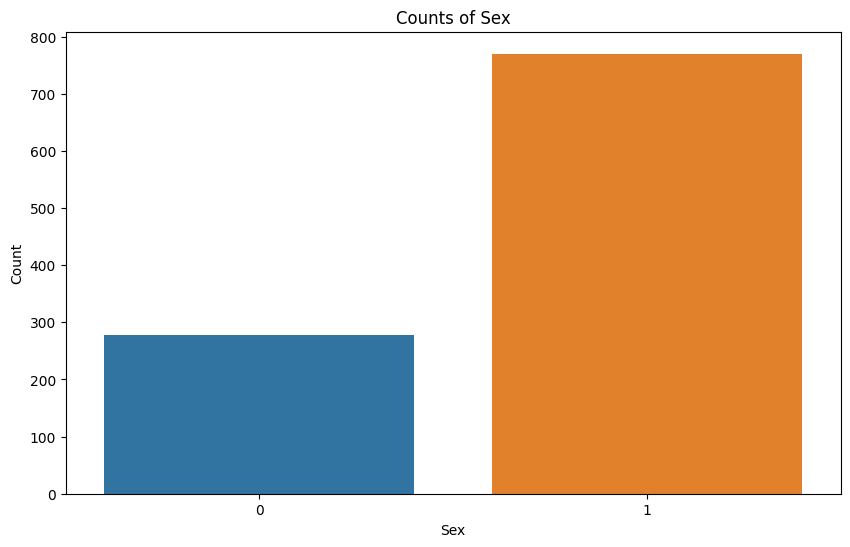

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='count', data=sex)

# Add title and labels
plt.title('Counts of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

# Show the plot
plt.show()

<h2>Sex and Target<h2>

In [19]:
df

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140.0,289.0,0,0,172.0,0,0.0,1,0
1,49,0,3,160.0,180.0,0,0,156.0,0,1.0,2,1
2,37,1,2,130.0,283.0,0,1,98.0,0,0.0,1,0
3,48,0,4,138.0,214.0,0,0,108.0,1,1.5,2,1
4,54,1,3,150.0,195.0,0,0,122.0,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1043,68,0,3,120.0,211.0,0,0,115.0,0,1.5,1,1
1044,44,0,3,108.0,141.0,0,1,175.0,0,0.6,1,1
1045,52,1,1,128.0,255.0,0,1,161.0,1,0.0,2,0
1046,59,1,4,160.0,273.0,0,0,125.0,0,0.0,2,0


In [20]:
sex_target = df['sex'].groupby(df['target']).value_counts().reset_index()

In [21]:
sex_target

,target,sex,count
0,0,1,362
1,0,0,166
2,1,1,408
3,1,0,112


Sex 0 meaning Male
Sex 1 Meaning Female

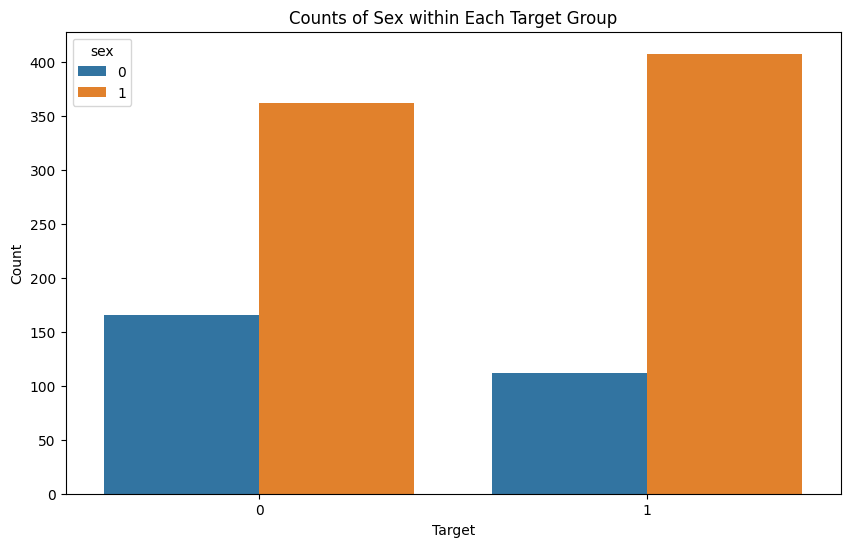

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='target', y='count', hue='sex', data=sex_target)

# Add title and labels
plt.title('Counts of Sex within Each Target Group')
plt.xlabel('Target')
plt.ylabel('Count')

# Show the plot
plt.show()

<h2>chest pain type<h2>

In [23]:
chest_pain_type = df['chest pain type'].value_counts().reset_index()
chest_pain_type

,chest pain type,count
0,4,393
1,3,255
2,2,216
3,1,184


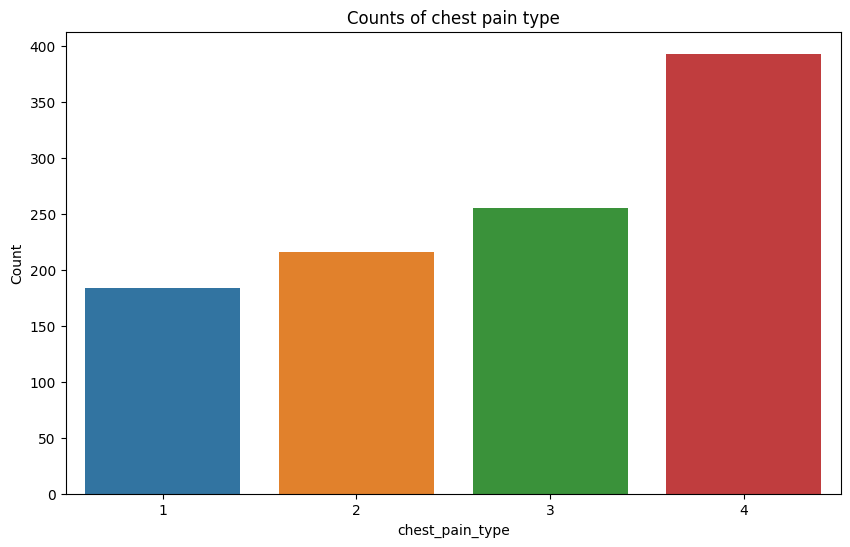

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='chest pain type', y='count', data=chest_pain_type)

# Add title and labels
plt.title('Counts of chest pain type')
plt.xlabel('chest_pain_type')
plt.ylabel('Count')

# Show the plot
plt.show()

# Preprocessing

In [25]:
df.head()

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140.0,289.0,0,0,172.0,0,0.0,1,0
1,49,0,3,160.0,180.0,0,0,156.0,0,1.0,2,1
2,37,1,2,130.0,283.0,0,1,98.0,0,0.0,1,0
3,48,0,4,138.0,214.0,0,0,108.0,1,1.5,2,1
4,54,1,3,150.0,195.0,0,0,122.0,0,0.0,1,0


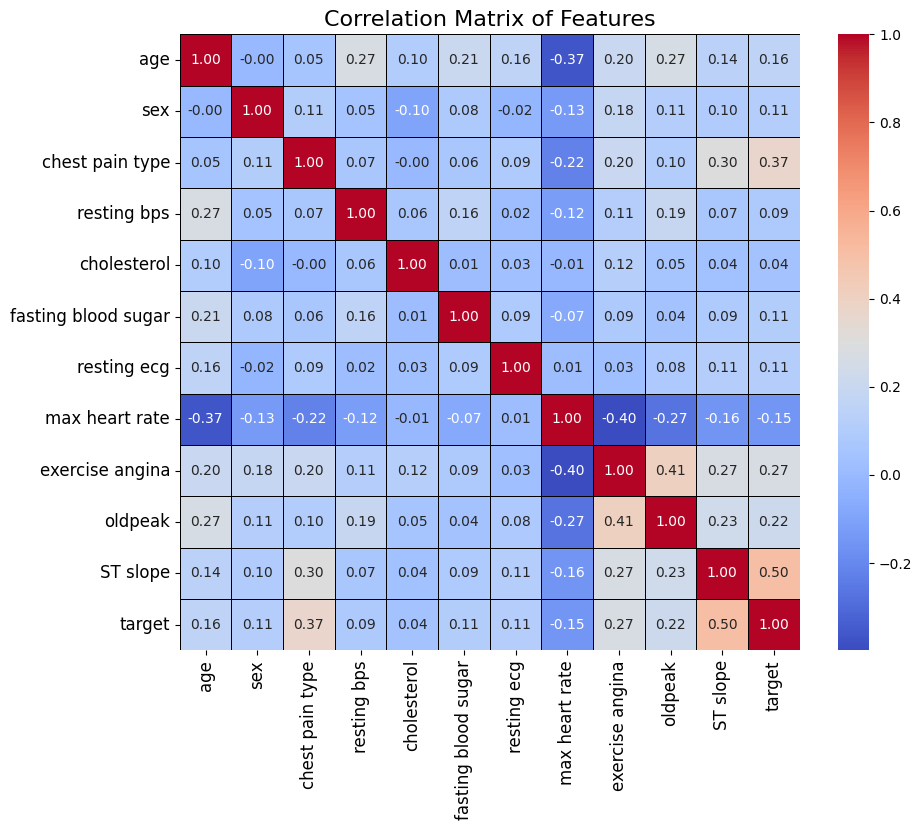

In [26]:
corr = df.corr()

# Create a heatmap with more details
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')

# Add title and adjust labels
plt.title('Correlation Matrix of Features', size=16)
plt.xticks(size=12)
plt.yticks(size=12, rotation=0)

# Show the plot
plt.show()

# Train Test Validation Split

In [27]:
X = df.drop('target',axis = 1)
y = df['target']

In [28]:
X

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140.0,289.0,0,0,172.0,0,0.0,1
1,49,0,3,160.0,180.0,0,0,156.0,0,1.0,2
2,37,1,2,130.0,283.0,0,1,98.0,0,0.0,1
3,48,0,4,138.0,214.0,0,0,108.0,1,1.5,2
4,54,1,3,150.0,195.0,0,0,122.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1043,68,0,3,120.0,211.0,0,0,115.0,0,1.5,1
1044,44,0,3,108.0,141.0,0,1,175.0,0,0.6,1
1045,52,1,1,128.0,255.0,0,1,161.0,1,0.0,2
1046,59,1,4,160.0,273.0,0,0,125.0,0,0.0,2


In [29]:
y

0       0
1       1
2       0
3       1
4       0
       ..
1043    1
1044    1
1045    0
1046    0
1047    0
Name: target, Length: 1048, dtype: int64

In [30]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [31]:
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.2,random_state=43)
X_valid, X_test, y_valid, y_test = train_test_split(X_,y_,test_size=0.5,random_state=43)

In [32]:
X_train.shape

(838, 11)

In [33]:
X_test.shape

(105, 11)

# Build the Model

In [34]:
model = Sequential([
    Dense(256, input_shape=(11,), activation='relu', kernel_regularizer=regularizers.l2(0.01)),  
    Dropout(0.2),  
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  
    Dropout(0.2),
    Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  
    Dropout(0.2),
    Dense(1, activation='sigmoid')  
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,233 (157.16 KB)

 Trainable params: 40,233 (157.16 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5419 - loss: nan - val_accuracy: 0.4190 - val_loss: nan
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5229 - loss: nan - val_accuracy: 0.4190 - val_loss: nan
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5086 - loss: nan - val_accuracy: 0.4190 - val_loss: nan
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4813 - loss: nan - val_accuracy: 0.4190 - val_loss: nan
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5346 - loss: nan - val_accuracy: 0.4190 - val_loss: nan
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5059 - loss: nan - val_accuracy: 0.4190 - val_loss: nan
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5111 - loss: nan - val_accuracy: 0.4190 - val_loss: nan
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5117 - loss: nan - val_accuracy: 0.4190 - val_loss: nan
Epoch 9/100
27/27 ━━━━━━━━━━━━━

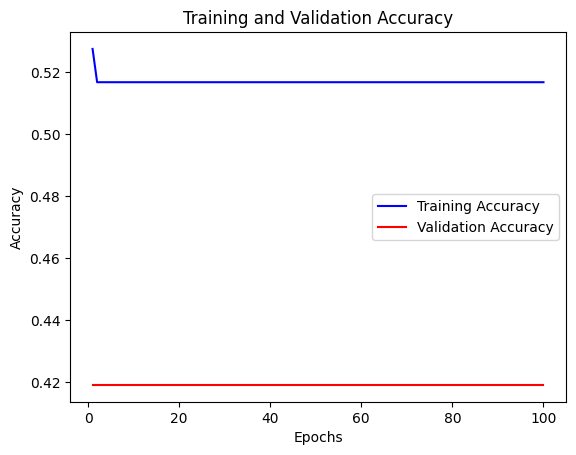

In [38]:
# Extract accuracy values
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Plot accuracy values
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy:{accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4735 - loss: nan 
Test Loss: nan, Test Accuracy:0.48571428656578064


In [40]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)
y_pred_flat = np.ravel(y_pred)
y_test_flat = np.ravel(y_test)
conf_matrix = confusion_matrix(y_test_flat, y_pred_flat)

print("Confusion Matrix:")
print(conf_matrix)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Confusion Matrix:
[[51  0]
 [54  0]]


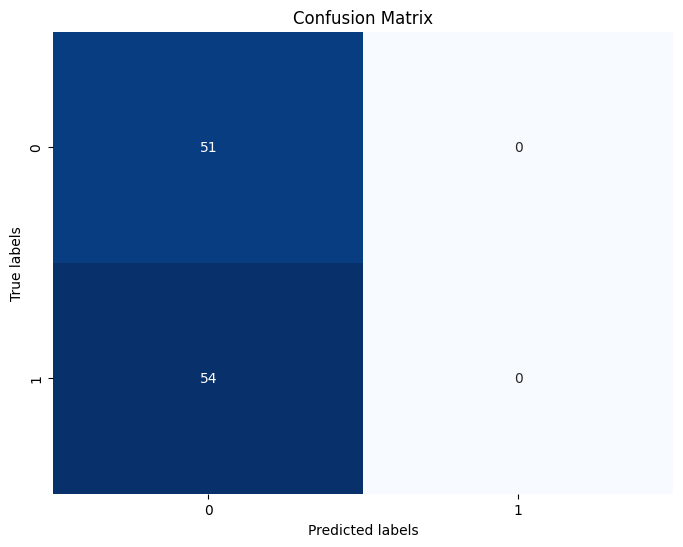

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [42]:
print("\nClassification Report:")
print(classification_report(y_test_flat, y_pred_flat))


Classification Report:
              precision    recall  f1-score   support

           0       0.49      1.00      0.65        51
           1       0.00      0.00      0.00        54

    accuracy                           0.49       105
   macro avg       0.24      0.50      0.33       105
weighted avg       0.24      0.49      0.32       105



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
